In [1]:
#Add Matplotlib inline magic command
%matplotlib inline

#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
#Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
#Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
#Get the columns and rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
#Get the columns and rows that are null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
#Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
#Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
#Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [10]:
#Get the number of data points from the Suburban cities.
sum(city_data_df["type"]=="Suburban")

36

In [11]:
#Get the number of data points from the Rural cities.
sum(city_data_df["type"]=="Rural")

18

In [12]:
#Get the columns and rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
#Get the columns and rows that are null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
#Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
#Merge the city and ride DataFrames into a single dataset.
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [16]:
#Create the Urban, Suburban and Rural city DataFrames.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]


In [19]:
#Get the number of rides for urban, suburban and rural cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [21]:
#Get average fare for each city in the urban, suburban and rural cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [23]:
#Get average number of drivers for each city in the urban, suburban and rural cities.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

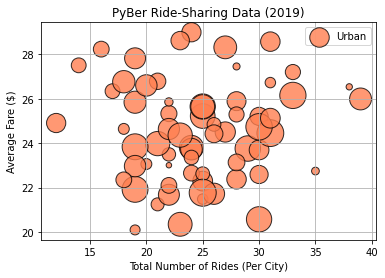

In [30]:
#Create scatterplot for urban cities
plt.scatter(urban_ride_count,urban_avg_fare, color="coral", s=urban_driver_count*10, edgecolor="black", alpha=0.8, linewidths=1, label="Urban")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

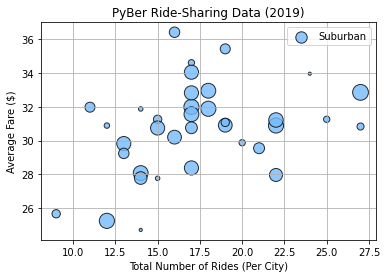

In [32]:
#Create scatterplot for suburban cities
plt.scatter(suburban_ride_count,suburban_avg_fare, color="xkcd:sky blue", s=suburban_driver_count*10, edgecolor="black", alpha=0.8, linewidths=1, label="Suburban")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

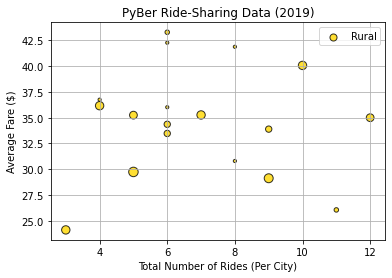

In [33]:
#Create scatterplot for rural cities
plt.scatter(rural_ride_count,rural_avg_fare, color="gold", s=rural_driver_count*10, edgecolor="black", alpha=0.8, linewidths=1, label="Rural")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

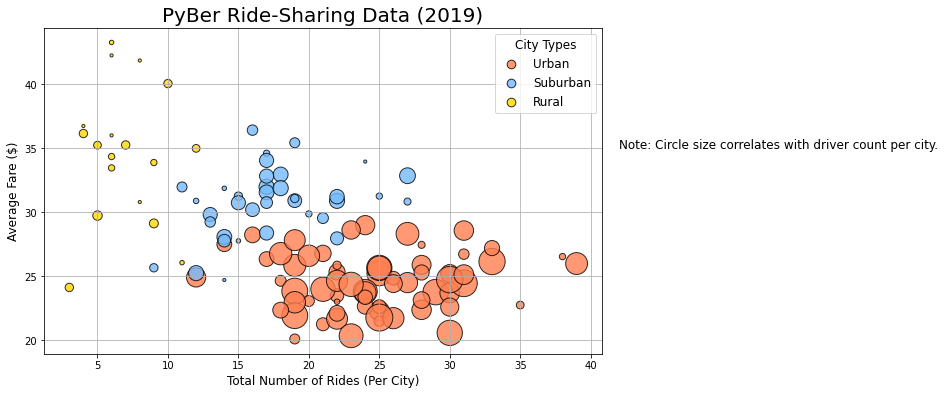

In [46]:
#Add the scatter charts for each type of city.
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,urban_avg_fare, color="coral", s=urban_driver_count*10, edgecolor="black", alpha=0.8, linewidths=1, label="Urban")
plt.scatter(suburban_ride_count,suburban_avg_fare, color="xkcd:sky blue", s=suburban_driver_count*10, edgecolor="black", alpha=0.8, linewidths=1, label="Suburban")
plt.scatter(rural_ride_count,rural_avg_fare, color="gold", s=rural_driver_count*10, edgecolor="black", alpha=0.8, linewidths=1, label="Rural")
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.grid(True)

#Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42,35,"Note: Circle size correlates with driver count per city.", fontsize="12")

#Save the figure.
plt.savefig("Analysis/Fig1.png", bbox_inches="tight")
plt.show

In [47]:
# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [48]:
# Get summary statistics.
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [49]:
# Get summary statistics.
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [50]:
# Get summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [51]:
# Get summary statistics.
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [52]:
# Get summary statistics.
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [53]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [59]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median()), round(suburban_ride_count.median()), round(rural_ride_count.median())

(24, 17, 6)

In [60]:
# Calculate the mode of the ride count for each city type.
round(urban_ride_count.mode()), round(suburban_ride_count.mode()), round(rural_ride_count.mode())

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [61]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [62]:
#Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [63]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [64]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [65]:
#Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [67]:
# Calculate the measures of central tendency for the fares for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare prices for urban trips is ${median_urban_fares}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is ${mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare prices for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [68]:
#Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [69]:
# Calculate the measures of central tendency for the fares for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare prices for suburban trips is ${median_suburban_fares}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is ${mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare prices for suburban trips is $30.75.
The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).


In [71]:
#Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [72]:
# Calculate the measures of central tendency for the fares for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare prices for rural trips is ${median_rural_fares}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is ${mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare prices for rural trips is $37.05.
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [73]:
#Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [74]:
#Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [75]:
#Get the driver count data from the rural cities.
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [78]:
# Calculate the measures of central tendency for the number of drivers for the urban cities.
mean_urban_driver_count = np.mean(urban_drivers)
print(f"The mean number of drivers for urban trips is {mean_urban_driver_count:.2f}.")

median_urban_driver_count = np.median(urban_drivers)
print(f"The median number of drivers for urban trips is {median_urban_driver_count}.")

mode_urban_driver_count = sts.mode(urban_drivers)
print(f"The mode number of drivers for urban trips is {mode_urban_driver_count}.")

The mean number of drivers for urban trips is 36.68.
The median number of drivers for urban trips is 37.0.
The mode number of drivers for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [80]:
# Calculate the measures of central tendency for the number of drivers for the suburban cities.
mean_suburban_driver_count = np.mean(suburban_drivers)
print(f"The mean number of drivers for suburban trips is {mean_suburban_driver_count:.2f}.")

median_suburban_driver_count = np.median(suburban_drivers)
print(f"The median number of drivers for suburban trips is {median_suburban_driver_count}.")

mode_suburban_driver_count = sts.mode(suburban_drivers)
print(f"The mode number of drivers for suburban trips is {mode_suburban_driver_count}.")

The mean number of drivers for suburban trips is 13.71.
The median number of drivers for suburban trips is 16.0.
The mode number of drivers for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [81]:
# Calculate the measures of central tendency for the number of drivers for the rural cities.
mean_rural_driver_count = np.mean(rural_drivers)
print(f"The mean number of drivers for rural trips is {mean_rural_driver_count:.2f}.")

median_rural_driver_count = np.median(rural_drivers)
print(f"The median number of drivers for rural trips is {median_rural_driver_count}.")

mode_rural_driver_count = sts.mode(rural_drivers)
print(f"The mode number of drivers for rural trips is {mode_rural_driver_count}.")

The mean number of drivers for rural trips is 4.30.
The median number of drivers for rural trips is 4.0.
The mode number of drivers for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


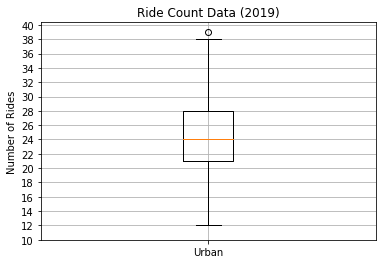

In [82]:
#Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

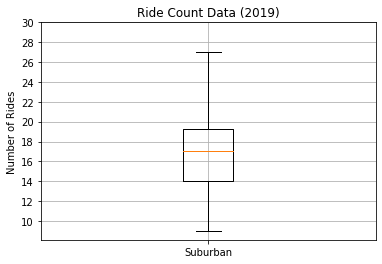

In [91]:
#Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 32, step=2.0))
ax.grid()
plt.show()

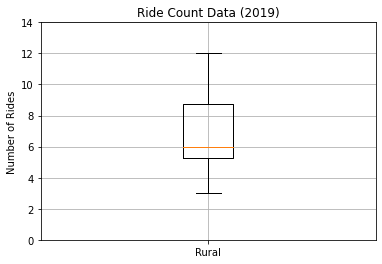

In [90]:
#Create a box-and-whisker plot for the rural cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 16, step=2.0))
ax.grid()
plt.show()

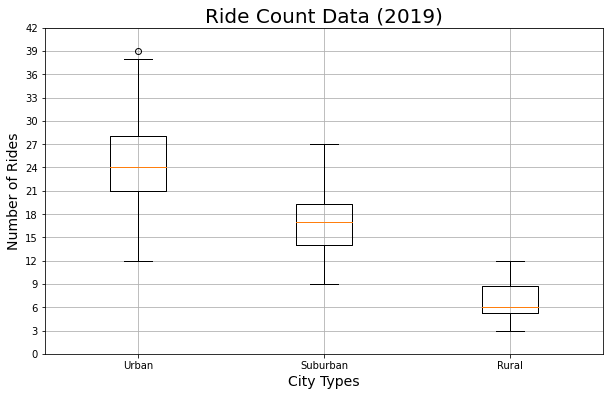

In [93]:
#Create a box-and-whisker plot for the urban, suburban and rural cities ride count.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))

# Add the title, labels and grid.
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_xlabel('City Types', fontsize=14)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

#Save the figure.
plt.savefig("Analysis/Fig2.png")
plt.show()

In [94]:
#Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


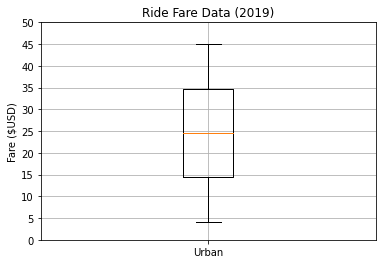

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [101]:
#Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

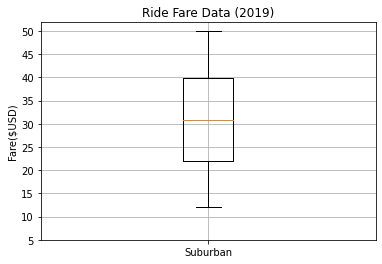

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [97]:
#Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(5, 55, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

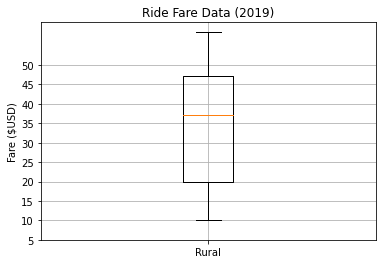

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [100]:
#Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(5, 55, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

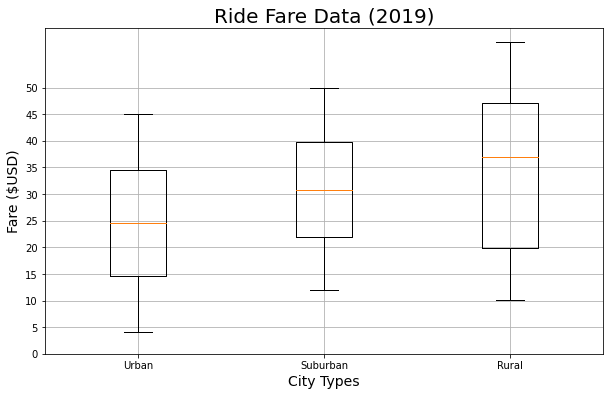

In [103]:
#Create a box-and-whisker plot for the urban, suburban and rural fare data.
x_labels = ["Urban","Suburban", "Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))


# Add the title, labels and grid.
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_xlabel('City Types', fontsize=14)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 55, step=5.0))
ax.grid()

#Save the figure.
plt.savefig("Analysis/Fig3.png")
plt.show()

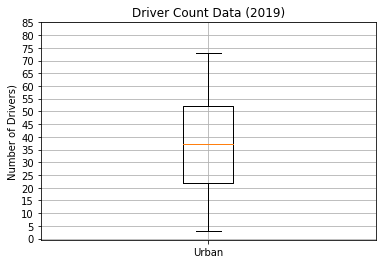

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [104]:
#Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

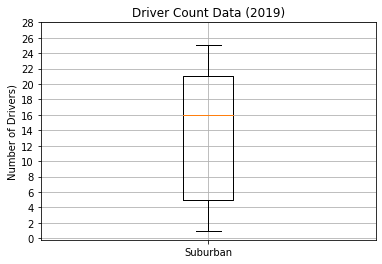

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [111]:
#Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 30, step=2.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

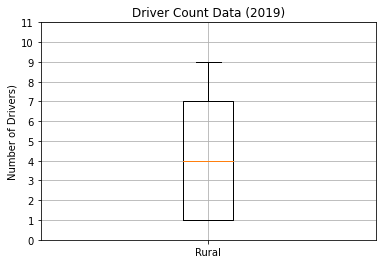

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [112]:
#Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 12, step=1.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

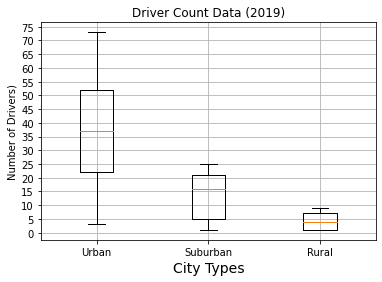

<Figure size 432x288 with 0 Axes>

In [114]:
#Create the box-and-whisker plot for the urban, suburban and rural driver count data.
x_labels = ["Urban", "Suburban", "Rural"]
fig, ax = plt.subplots()
driver_data = [urban_drivers, suburban_drivers, rural_drivers]

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_xlabel('City Types', fontsize=14)
ax.set_ylabel('Number of Drivers)')
ax.boxplot(driver_data,labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
plt.show()

#Save the figure.
plt.savefig("Analysis/Fig4.png")
plt.show()